In [ ]:
# Importer les bibliothèques nécessaires
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Fonction pour afficher une image
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
# Charger les images
foreground = cv2.imread("/content/drive/MyDrive/projet pole/Nouvelle Version/random_frame.jpg")  # Image à insérer
background = cv2.imread("/content/drive/MyDrive/projet pole/Nouvelle Version/studio_jungle_sdxl.png")  # Image de fond
mask = cv2.imread("/content/drive/MyDrive/projet pole/Nouvelle Version/mask_ally.png", cv2.IMREAD_GRAYSCALE)  # Masque en niveaux de gris

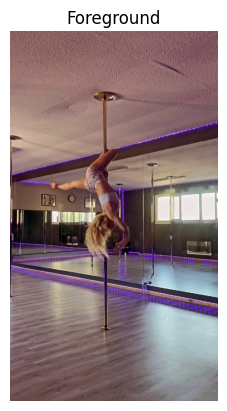

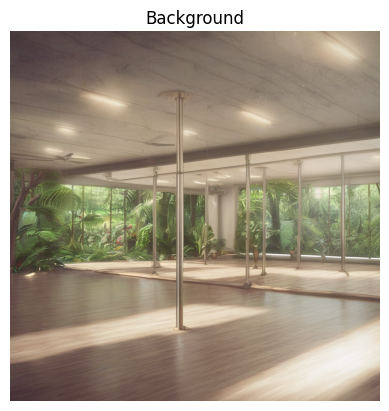

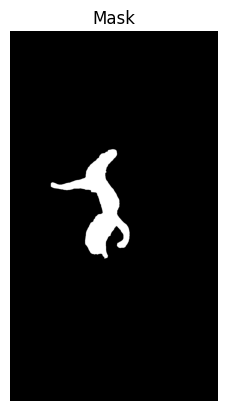

In [ ]:
# Afficher les images chargées
display_image(foreground, "Foreground")
display_image(background, "Background")
display_image(mask, "Mask")

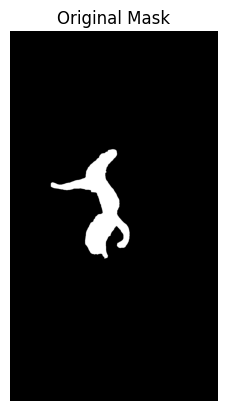

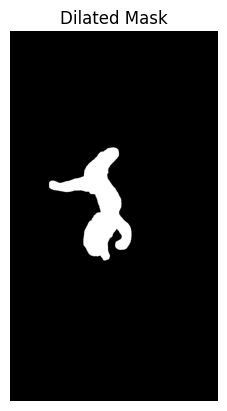

In [ ]:
import cv2
import numpy as np


# Définir le noyau de dilatation (taille et forme)
kernel_size = 20  # Ajuster cette valeur pour dilater davantage
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

# Appliquer la dilatation
dilated_mask = cv2.dilate(mask, kernel, iterations=1)

# Afficher le masque original et le masque dilaté
# Afficher le masque original et le masque dilaté
display_image(mask,"Original Mask") #display mask
display_image(dilated_mask,"Dilated Mask") #display dilated_mask


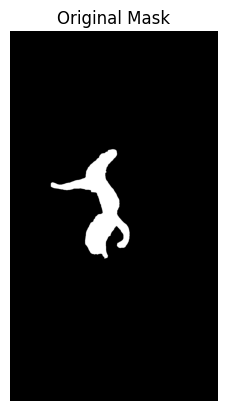

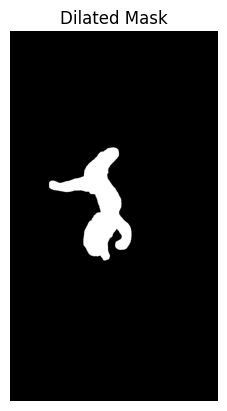

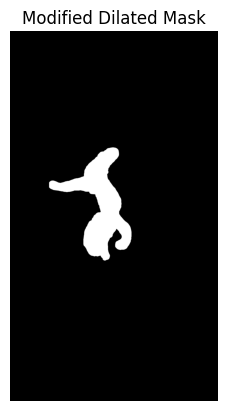

In [ ]:
# Trouver les pixels non-zéro dans le masque dilaté
non_zero_pixels = np.nonzero(dilated_mask)

# Définir une hauteur seuil (par exemple, les 10% inférieurs de l'image)
height_threshold = int(0.1 * dilated_mask.shape[0])

# Mettre à zéro les pixels en dessous du seuil
for y, x in zip(*non_zero_pixels):
  if y > dilated_mask.shape[0] - height_threshold:
      dilated_mask[y, x] = 0

# Afficher le masque original et le masque dilaté et modifié
display_image(mask,"Original Mask") #display mask
display_image(dilated_mask,"Dilated Mask") #display dilated_mask
display_image(dilated_mask,"Modified Dilated Mask") #display dilated_mask

In [ ]:
# Vérifier et ajuster les dimensions si nécessaire
if foreground.shape[:2] != background.shape[:2]:
    print("Redimensionnement des images pour correspondre...")
    background = cv2.resize(background, (foreground.shape[1], foreground.shape[0]))
    mask = cv2.resize(mask, (foreground.shape[1], foreground.shape[0]))

Redimensionnement des images pour correspondre...


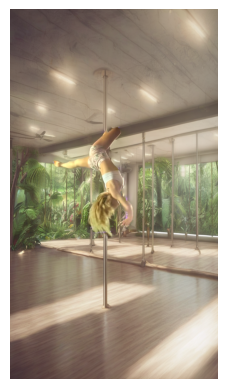

In [ ]:
# Définir la position où insérer l'image (le centre de la région de collage)
# Par exemple, insérer au centre de l'image
#point = (background.shape[1] // 2 + 45 , background.shape[0] // 2 - 60)
point = (background.shape[1] // 2 - 105 , background.shape[0] // 2 - 60)

# Appliquer le Poisson Blending
# Modes possibles : NORMAL_CLONE, MIXED_CLONE, MONOCHROME_TRANSFER
blended = cv2.seamlessClone( foreground ,background, dilated_mask, point, cv2.NORMAL_CLONE)

# Afficher le résultat
display_image(blended, "")

In [ ]:
# Sauvegarder le résultat
cv2.imwrite("/content/drive/MyDrive/projet pole/Nouvelle Version/poisson_blended_result.jpg", blended)
print("Résultat sauvegardé sous le nom 'poisson_blended_result.jpg'")

Résultat sauvegardé sous le nom 'poisson_blended_result.jpg'
